In [ ]:
import pandas as pd

# Load dataset
file_path = "Pengalaman Terhadap Fasilitas Parkir Mobil di Fakultas Teknik UI (Jawaban) - Form Responses 1.csv"
df = pd.read_csv(file_path)

# Display first few rows of the dataset
df.head()


,Timestamp,Nama,Jenis Kelamin,Jenjang Pendidikan,Departemen,Apakah anda membawa kendaraan pribadi (mobil) ke lingkungan Universitas Indonesia?,Seberapa sering anda mengendarai mobil ke lingkungan FTUI? (dalam satu minggu),Pada jam berapakah biasanya anda sampai di FTUI? (boleh lebih dari satu),Bagaimana pengalaman anda dalam mencari parkir mobil di lingkungan FTUI?,Berapa lama rata-rata waktu yang anda habiskan untuk mencari tempar parkir di FTUI?,Faktor apakah yang anda rasakan mempengaruhi kesulitan dalam mencari parkir? (boleh lebih dari satu),Apa kendala utama yang anda alami dalam mencari parkir di FTUI? (boleh lebih dari satu),Di daerah manakah anda biasanya mendapatkan parkir? (boleh lebih dari satu),Bagaimana menurut anda ketersediaan lahan parkir mobil di lingkungan FTUI?,Bagaimana pandangan anda terhadap banyaknya mobil yang terparkir di sepanjang jalan utama UI? (parkir liar),"Menurut anda, solusi apa yang dirasa efektif untuk mengatasi permasalahan parkir mobil di FTUI? (boleh lebih dari satu)",Seberapa puas anda dengan kondisi fasilitas parkir mobil FTUI saat ini?
0,18/02/2025 8:08:31,Amalia,Perempuan,S3,Teknik Sipil,NaN,Setiap hari,08.00 - 10.00,Sangat sulit,>20 menit,Keterbatasan lahan parkir,"Kapasitas parkir yang terbatas, Tidak adanya i...",Gedung S dan Engineering Center,Sangat kurang,NaN,"Pembangunan fasilitas parkir bertingkat, Pemba...",2
1,19/02/2025 10:21:34,Edisis,Laki-laki,S3,Teknik Elektro,Ya,1-3 hari,12.00 - 14.00,Sulit,5 - 10 menit,Keterbatasan lahan parkir,Kapasitas parkir yang terbatas,Pinggir jalan utama UI (parkir liar),Sangat kurang,"Cukup mengganggu, tetapi masih dapat ditolerir...",Peningkatan layanan transportasi kampus (bis k...,2
2,19/02/2025 10:22:20,Kiun,Laki-laki,S3,Teknik Sipil,Ya,1-3 hari,"08.00 - 10.00, 10.00 - 12.00",Sangat sulit,10 - 20 menit,"Jam kedatangan, Keterbatasan lahan parkir","Kapasitas parkir yang terbatas, Tidak adanya i...",Jalanan sekeliling Pusgiwa UI,Sangat kurang,"Sangat mengganggu, karena menyebabkan kemaceta...","Pembangunan fasilitas parkir bertingkat, Pemba...",1
3,19/02/2025 10:23:48,Adi,Laki-laki,S3,Teknik Elektro,Ya,1-3 hari,"06.00 - 08.00, 08.00 - 10.00",Sangat sulit,10 - 20 menit,Keterbatasan lahan parkir,"Kapasitas parkir yang terbatas, Tidak adanya i...","Jalanan sekeliling Pusgiwa UI, Samping Gedung ...",Sangat kurang,"Sangat mengganggu, karena menyebabkan kemaceta...","Pembangunan gedung parkir, Implementasi sistem...",3
4,19/02/2025 10:24:26,Richard,Laki-laki,S3,Teknik Mesin,Tidak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sangat kurang,"Sangat mengganggu, karena menyebabkan kemaceta...","Pembangunan fasilitas parkir bertingkat, Pemba...",2


In [ ]:
# Pembersihan dan transformasi data

# Mengubah kolom 'Seberapa puas anda dengan kondisi fasilitas parkir mobil FTUI saat ini?' menjadi numerik
df_cleaned = df.copy()
df_cleaned.rename(columns={'Seberapa puas anda dengan kondisi fasilitas parkir mobil FTUI saat ini?': 'Tingkat Kepuasan'}, inplace=True)
df_cleaned['Tingkat Kepuasan'] = pd.to_numeric(df_cleaned['Tingkat Kepuasan'], errors='coerce')

# Mengonversi waktu yang dihabiskan mencari parkir ke numerik (dalam menit)
def convert_waktu_parkir(val):
    if pd.isna(val):
        return None
    if ">20 menit" in val:
        return 25  # Menggunakan asumsi 25 menit untuk kategori lebih dari 20 menit
    elif "10 - 20 menit" in val:
        return 15  # Rata-rata dari rentang ini
    elif "5 - 10 menit" in val:
        return 7.5  # Rata-rata dari rentang ini
    elif "<5 menit" in val:
        return 3  # Menggunakan asumsi 3 menit untuk kategori kurang dari 5 menit
    return None

df_cleaned['Waktu Mencari Parkir (menit)'] = df_cleaned['Berapa lama rata-rata waktu yang anda habiskan untuk mencari tempar parkir di FTUI?'].apply(convert_waktu_parkir)

# Mengonversi kepuasan ketersediaan lahan parkir menjadi skor numerik
mapping_ketersediaan = {
    "Sangat kurang": 1,
    "Kurang": 2,
    "Cukup": 3,
    "Baik": 4,
    "Sangat baik": 5
}
df_cleaned['Skor Ketersediaan Lahan Parkir'] = df_cleaned['Bagaimana menurut anda ketersediaan lahan parkir mobil di lingkungan FTUI?'].map(mapping_ketersediaan)

# Mengonversi tingkat kesulitan mencari parkir menjadi skor numerik
mapping_kesulitan = {
    "Sangat sulit": 5,
    "Sulit": 4,
    "Cukup sulit": 3,
    "Mudah": 2,
    "Sangat mudah": 1
}
df_cleaned['Skor Kesulitan Parkir'] = df_cleaned['Bagaimana pengalaman anda dalam mencari parkir mobil di lingkungan FTUI?'].map(mapping_kesulitan)

# Menghapus kolom yang tidak diperlukan
df_cleaned = df_cleaned[['Tingkat Kepuasan', 'Waktu Mencari Parkir (menit)', 'Skor Ketersediaan Lahan Parkir', 'Skor Kesulitan Parkir']].dropna()

# Tampilkan data yang telah dibersihkan
df_cleaned


,Tingkat Kepuasan,Waktu Mencari Parkir (menit),Skor Ketersediaan Lahan Parkir,Skor Kesulitan Parkir
0,2,25.0,1,5.0
1,2,7.5,1,4.0
2,1,15.0,1,5.0
3,3,15.0,1,5.0
5,2,15.0,1,5.0
7,3,7.5,2,4.0
8,1,15.0,1,5.0
9,1,15.0,1,5.0
10,2,7.5,2,4.0
11,1,15.0,1,5.0


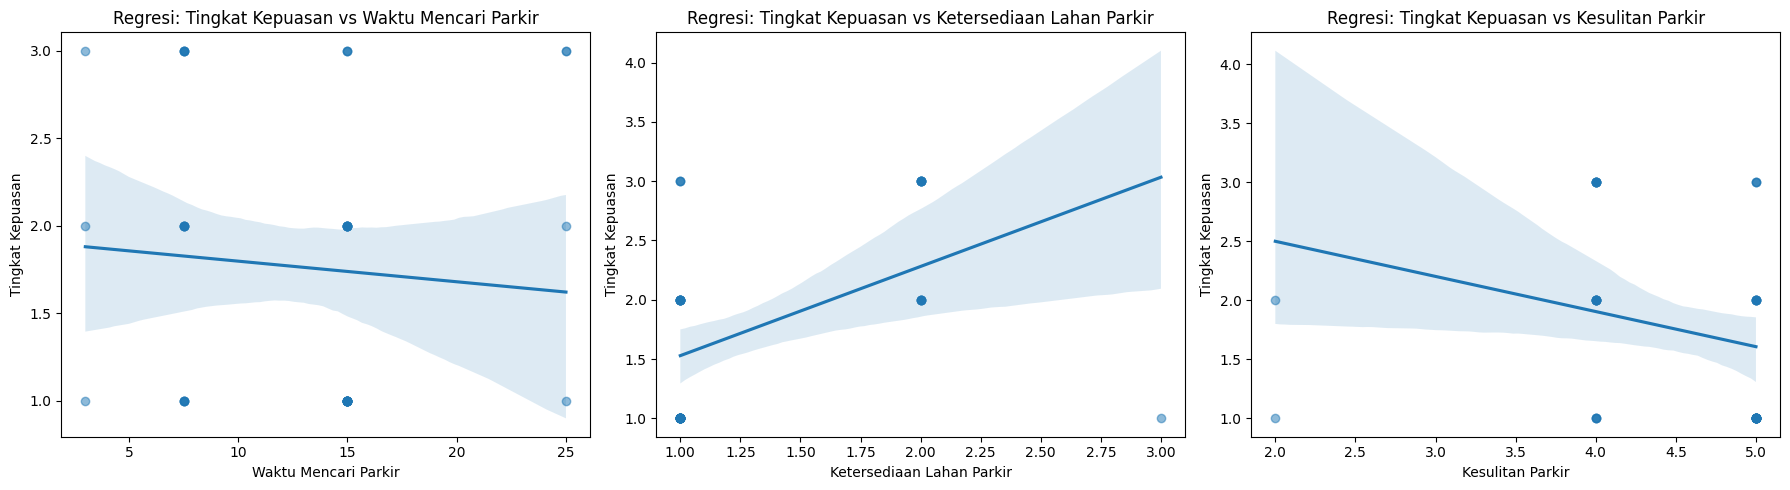

{'Waktu Mencari Parkir (menit)': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:       Tingkat Kepuasan   R-squared:                       0.007
 Model:                            OLS   Adj. R-squared:                 -0.014
 Method:                 Least Squares   F-statistic:                    0.3223
 Date:                Sun, 09 Mar 2025   Prob (F-statistic):              0.573
 Time:                        09:37:20   Log-Likelihood:                -59.649
 No. Observations:                  51   AIC:                             123.3
 Df Residuals:                      49   BIC:                             127.2
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
 -------------------

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Melakukan regresi sederhana untuk setiap variabel terhadap tingkat kepuasan
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

variables = [
    ("Waktu Mencari Parkir (menit)", "Waktu Mencari Parkir"),
    ("Skor Ketersediaan Lahan Parkir", "Ketersediaan Lahan Parkir"),
    ("Skor Kesulitan Parkir", "Kesulitan Parkir")
]

models = {}

for i, (var, label) in enumerate(variables):
    X = df_cleaned[var]
    y = df_cleaned["Tingkat Kepuasan"]
    X = sm.add_constant(X)  # Menambahkan konstanta untuk regresi

    # Melakukan regresi
    model = sm.OLS(y, X).fit()
    models[var] = model

    # Scatter plot dan regresi line
    sns.regplot(x=df_cleaned[var], y=df_cleaned["Tingkat Kepuasan"], ax=axes[i], scatter_kws={'alpha': 0.5})
    axes[i].set_title(f'Regresi: Tingkat Kepuasan vs {label}')
    axes[i].set_xlabel(label)
    axes[i].set_ylabel('Tingkat Kepuasan')

plt.tight_layout()
plt.show()

# Menampilkan ringkasan hasil regresi
regression_summaries = {var: model.summary() for var, model in models.items()}
regression_summaries
